## Haberman Dataset

Dataset contains cases from study conducted on the survival of patients who had undergone surgery for breast cancer

http://networkrepository.com/haberman.php

In [5]:
#Importing all the necessary packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#For displaying plots within the notebook 
%matplotlib inline 

In [6]:
#Reading the data from csv file and writing it to DataFrame -df

df=pd.read_csv('haberman.csv')

In [7]:
# Overview of the DataFrame by checking top 3 rows 

df.head(3)

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1


In [8]:
# Checking rows & Columns 
df.shape  

# dataset has 306 rows and 4 columns 

(306, 4)

In [9]:
# Checking the names of the columns
df.columns
# There are 4 features or columns in the dataset

Index(['age', 'year', 'nodes', 'status'], dtype='object')

#### Further information on columns for realistic interpretation of data

1. age of the patient
2. year - year in which patient was operated
3. nodes - Number of positive auxillary nodes detected 
4. status- Survival Status 
           1=survived 5+ years after surgery
           2=died within 5 years after surgery
           
 Source - http://networkrepository.com/haberman.php

## Objective: 
 To find the feature or combination of features that help in the prediction of the survival of the patient post surgery 

In [10]:
df['status'].value_counts()

1    225
2     81
Name: status, dtype: int64

225 people have survived 5+ years after the surgery & 81 people died within 5 years after surgery.

### High level statistics

1. Number of points - 306
2. Number of features - 4
3. Number of classes - 2  ( Survived more than 5 yrs after surgery & Died within 5 yrs after surgery)
4. Data points per classes: Status=1 - 225 data points; Status=2 - 81 data points
    
Hence, The current dataset is an imbalanced data set skewed towards those who survived more that 5 years after surgery (status=1)

In [11]:
df.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [12]:
df[df['nodes']==0]['status'].value_counts()

1    117
2     19
Name: status, dtype: int64

* Since the min value of nodes =0, it is better to check the no. of cases in which nodes does not have influence on the status. 

* In 45% (136/306) cases in this dataset, no. of nodes detected has no influence on the survival of patient in the dataset. 
* So,status may have been influenced by the age & year of operation in this 45% cases. 

In [13]:
#Calculating 90th percentile of age & nodes 

node_90per=np.percentile(df['nodes'],95)
age_90per=np.percentile(df['age'],90)
print(node_90per)
print(age_90per)

19.75
67.0


## Univariate Analysis
### Distribution Plots

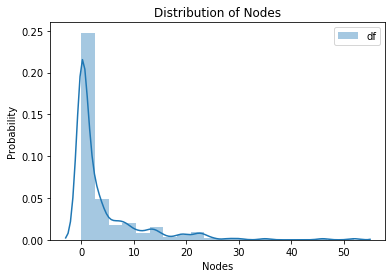

In [17]:
sns.distplot(df['nodes'],bins=20,label='df')
plt.title('Distribution of Nodes')
plt.xlabel('Nodes')
plt.ylabel('Probability')

It is evenident that 
* Though the max no of detected nodes is 52, in 75% of the cases, no of nodes is <= 4 & even in 95% of the cases, no of nodes is <= 20.  Same can be corroborated with skewness of the distplot towards lower no of nodes. 

In [19]:
survive=df[df['status']==1][['age','year','nodes']]
dead=df[df['status']==2][['age','year','nodes']]

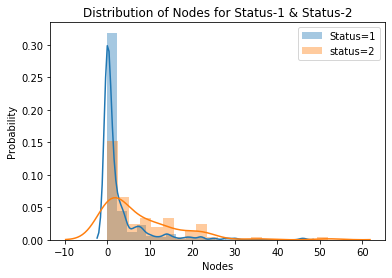

In [21]:
sns.distplot(survive['nodes'],bins=20,label='Status=1')
sns.distplot(dead['nodes'],bins=20,label='status=2')
plt.title('Distribution of Nodes for Status-1 & Status-2')
plt.xlabel('Nodes')
plt.ylabel('Probability')
plt.legend()

* Due to the overlap, nodes cannot be considered as an individual feature that helps in classification. Howerever following points can be deduced from the plot 
    + In the case of those survived more than 5 yrs after surgery, no.of nodes are in narrow range with most <= 10. 
    + In the case of those died within 5 years afer surgery, no. of nods vary in a broad range with most <= 30

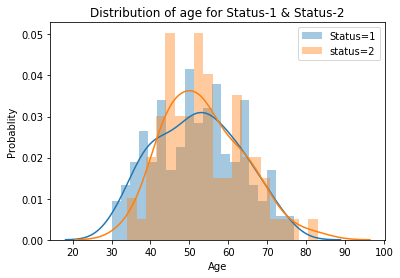

In [23]:
sns.distplot(survive['age'],bins=20,label='Status=1')
sns.distplot(dead['age'],bins=20,label='status=2')
plt.title('Distribution of age for Status-1 & Status-2')
plt.xlabel('Age')
plt.ylabel('Probablity')
plt.legend()

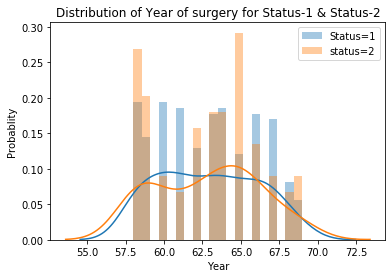

In [31]:
sns.distplot(survive['year'],bins=20,label='Status=1')
sns.distplot(dead['year'],bins=20,label='status=2')
plt.title('Distribution of Year of surgery for Status-1 & Status-2')
plt.xlabel('Year')
plt.ylabel('Probablity')
plt.legend()
plt.legend()

* Due to the almost complete overlap of status in distribution plots of age & year of surgery, no inference can be drawn from the plots that could help in indentification of status

Text(0, 0.5, 'Probablity')

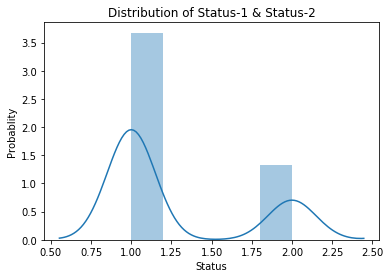

In [26]:
sns.distplot(df['status'],bins=5)
plt.title('Distribution of Status-1 & Status-2')
plt.xlabel('Status')
plt.ylabel('Probablity')

This validates the fact that dataset is imbalanced and skewed towards Status=1

### Probability Density function (PDF) & Cumulative Distribution functions (CDF)


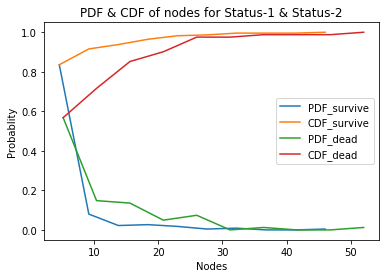

In [28]:
# PDF & CDF Plotting of nodes for status=1 (Survived more than 5 years after surgery) 
counts,bin_edges=np.histogram(survive['nodes'],bins=10,density=True)

pdf=counts/(sum(counts))
cdf=np.cumsum(pdf)

plt.plot(bin_edges[1:],pdf,label='PDF_survive')
plt.plot(bin_edges[1:],cdf,label='CDF_survive')

# PDF & CDF Plotting of nodes for status=2 (Died within 5 years after surgery) 
counts,bin_edges=np.histogram(dead['nodes'],bins=10,density=True)

pdf=counts/(sum(counts))
cdf=np.cumsum(pdf)

plt.plot(bin_edges[1:],pdf,label='PDF_dead')
plt.plot(bin_edges[1:],cdf,label='CDF_dead')
plt.title('PDF & CDF of nodes for Status-1 & Status-2')
plt.xlabel('Nodes')
plt.ylabel('Probablity')
plt.legend()

* In 82% of cases in which people survived more than 5 yrs after surgery, no. of nodes is <= 4 & %ge drops to < 10% as the no of nodes increases beyond 10 

* In 55% of the cases in which people died within 5 yrs after surgery, no. of nodes is <=5 & %ge drops to 10% as the no of nodes increases beyond 20

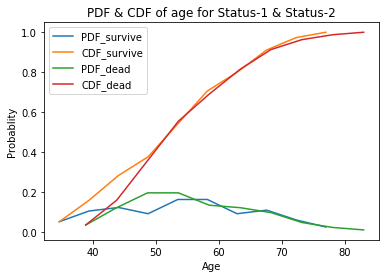

In [29]:
# PDF & CDF Plotting of nodes for status=1 (Survived more than 5 years after surgery) 
counts,bin_edges=np.histogram(survive['age'],bins=10,density=True)

pdf=counts/(sum(counts))
cdf=np.cumsum(pdf)

plt.plot(bin_edges[1:],pdf,label='PDF_survive')
plt.plot(bin_edges[1:],cdf,label='CDF_survive')

# PDF & CDF Plotting of nodes for status=2 (Died within 5 years after surgery) 
counts,bin_edges=np.histogram(dead['age'],bins=10,density=True)

pdf=counts/(sum(counts))
cdf=np.cumsum(pdf)

plt.plot(bin_edges[1:],pdf,label='PDF_dead')
plt.plot(bin_edges[1:],cdf,label='CDF_dead')
plt.title('PDF & CDF of age for Status-1 & Status-2')
plt.xlabel('Age')
plt.ylabel('Probablity')
plt.legend()

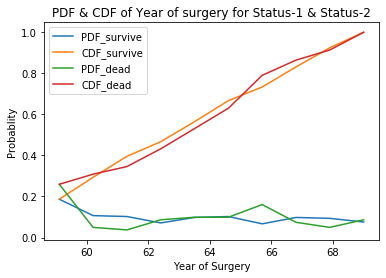

In [30]:
# PDF & CDF Plotting of nodes for status=1 (Survived more than 5 years after surgery) 
counts,bin_edges=np.histogram(survive['year'],bins=10,density=True)

pdf=counts/(sum(counts))
cdf=np.cumsum(pdf)

plt.plot(bin_edges[1:],pdf,label='PDF_survive')
plt.plot(bin_edges[1:],cdf,label='CDF_survive')

# PDF & CDF Plotting of nodes for status=2 (Died within 5 years after surgery) 
counts,bin_edges=np.histogram(dead['year'],bins=10,density=True)

pdf=counts/(sum(counts))
cdf=np.cumsum(pdf)

plt.plot(bin_edges[1:],pdf,label='PDF_dead')
plt.plot(bin_edges[1:],cdf,label='CDF_dead')

plt.title('PDF & CDF of Year of surgery for Status-1 & Status-2')
plt.xlabel('Year of Surgery')
plt.ylabel('Probablity')
plt.legend()

### Box plots

Text(0, 0.5, 'Nodes')

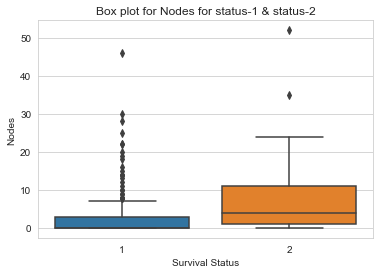

In [99]:
sns.boxplot(x='status',y='nodes',data=df)
sns.set_style('whitegrid')

plt.title('Box plot for Nodes for status-1 & status-2')
plt.xlabel('Survival Status')
plt.ylabel('Nodes')

Text(0, 0.5, 'Age')

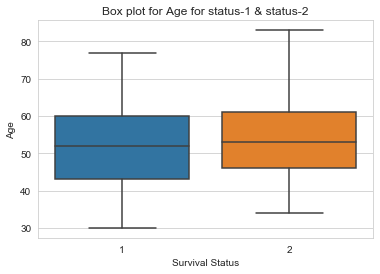

In [98]:
sns.boxplot(x='status',y='age',data=df)
sns.set_style('whitegrid')

plt.title('Box plot for Age for status-1 & status-2')
plt.xlabel('Survival Status')
plt.ylabel('Age')

Text(0, 0.5, 'Year of Surgery')

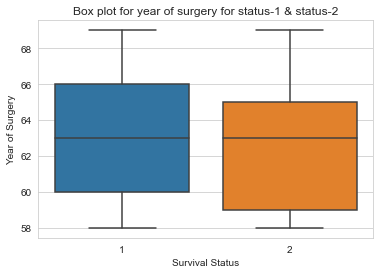

In [44]:
sns.boxplot(x='status',y='year',data=df)
sns.set_style('whitegrid')

plt.title('Box plot for year of surgery for status-1 & status-2')
plt.xlabel('Survival Status')
plt.ylabel('Year of Surgery')

Again, due to the ovarlap, no new inference can be obtained from the above three box plots

### Violin plots

Text(0, 0.5, 'Nodes')

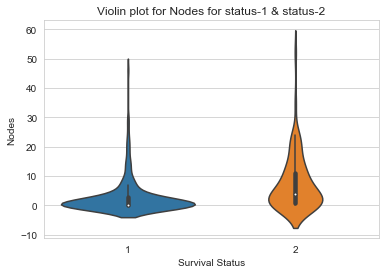

In [46]:
sns.violinplot(x='status',y='nodes',data=df,split=True)
sns.set_style('whitegrid')

plt.title('Violin plot for Nodes for status-1 & status-2')
plt.xlabel('Survival Status')
plt.ylabel('Nodes')

Text(0, 0.5, 'Age')

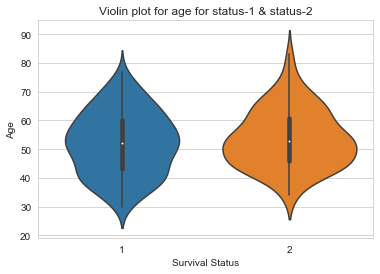

In [47]:
sns.violinplot(x='status',y='age',data=df,split=True)
sns.set_style('whitegrid')

plt.title('Violin plot for age for status-1 & status-2')
plt.xlabel('Survival Status')
plt.ylabel('Age')

Text(0, 0.5, 'Year of Surgery')

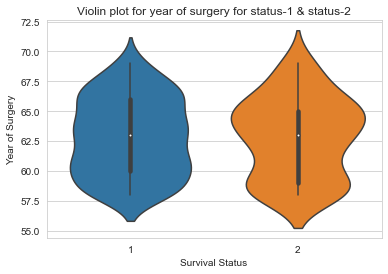

In [48]:
sns.violinplot(x='status',y='year',data=df,split=True)
sns.set_style('whitegrid')

plt.title('Violin plot for year of surgery for status-1 & status-2')
plt.xlabel('Survival Status')
plt.ylabel('Year of Surgery')

* As violin plots are combination of the boxplots and distplots, no new inference can be made from this plots. 

In [50]:
df.columns

Index(['age', 'year', 'nodes', 'status'], dtype='object')

## Bi-variate Analysis

### Pair plot

Text(0.5, 0.98, 'Pair plot with variables Age, Year, Nodes')

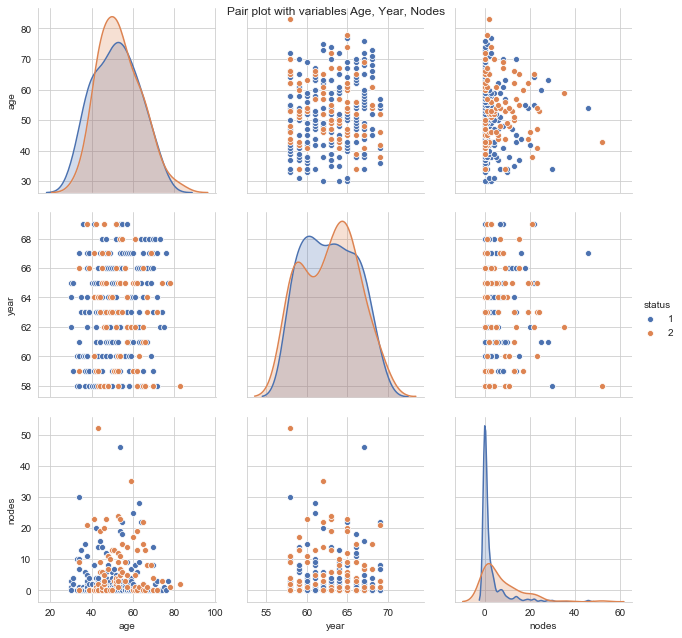

In [72]:
#sns.set_style('whitegrid')
sns.pairplot(df,vars=['age','year','nodes'],hue='status',palette='deep',height=3)

plt.suptitle('Pair plot with variables Age, Year, Nodes')

* None of the scatter plots above provide demarcation for classifying the status as they are closely palced next to each other. Hence none of combining features can be useful for predicting the outcome. 

* To gain further insight, divinding the dataset into 
1. set with no node influence (nodes detected=0) & 
2. set with nodes influence could be present are detected

In [59]:
no_nodeinf=df[df['nodes']==0][['age','year','status']]
nodeinf=df[df['nodes']!=0][['age','year','nodes','status']]

Text(0.5, 0.98, 'Pair plot with variables Age & Year for zero nodes detected cases')

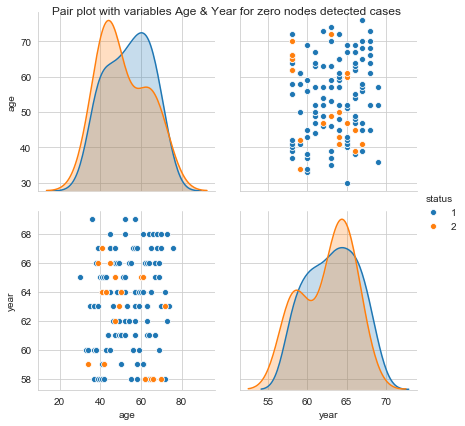

In [100]:
# Performing analysis on dataset in which there is no node influence
# features in this dataset= age, year and outcome = status

sns.pairplot(no_nodeinf,vars=['age','year'],hue='status',height=3)
plt.suptitle('Pair plot with variables Age & Year for zero nodes detected cases')

Some demarcation can be made from the age vs year scatter plot

Text(0.5, 1.0, 'Scatter plot for Age & Year for zero nodes detected cases')

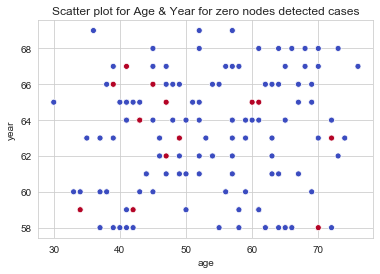

In [101]:
sns.scatterplot(x=no_nodeinf['age'],y=no_nodeinf['year'],data=no_nodeinf,hue='status',palette='coolwarm',legend=False)
plt.title('Scatter plot for Age & Year for zero nodes detected cases')

#### Case in which no nodes are detected: 
* If the age is in the range of (age<40) & (age>50), irrespective of year of operation, patients have survived
* To improve the accuracy of the prediction, age & year must be considered in more narrow range-
       such as age = 50-60 ; for all years of operation
             age = 60-70 ; for years = 58-62 , 64 & 66-68

Text(0.5, 0.98, 'Pair plot with variables Age & Year')

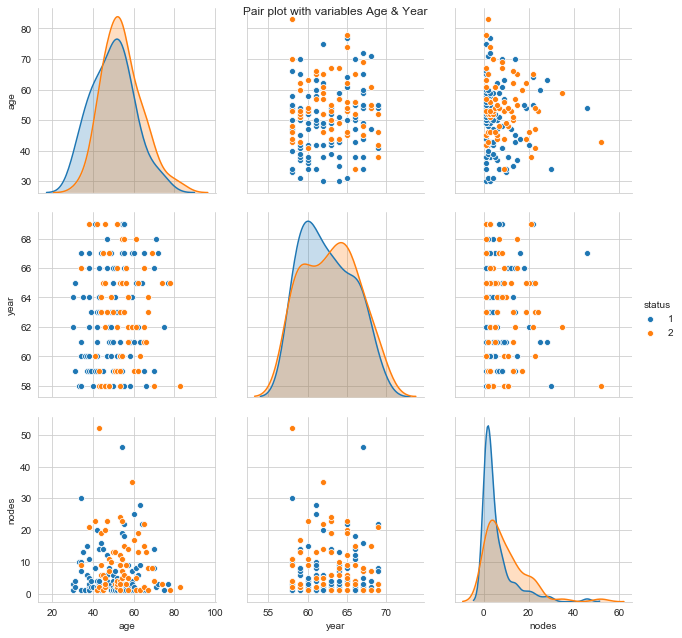

In [103]:
# Performing analysis on dataset in which there is a node influence
# features in this dataset= age, year , node and outcome = status

sns.pairplot(nodeinf,vars=['age','year','nodes'],hue='status',height=3)
plt.suptitle('Pair plot with variables Age & Year')


Text(0.5, 1.0, 'Scatterplot for year & age')

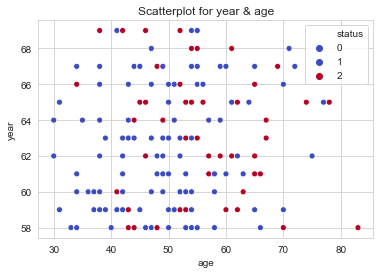

In [104]:
sns.scatterplot(x=nodeinf['age'],y=nodeinf['year'],data=nodeinf,hue='status',palette='coolwarm')
plt.title('Scatterplot for year & age')

#### Case in which nodes are detected: 
* If the age is < 40, irrespective of the year of operation, patients have survived more that 5 yrs after the surgery

## Final conclusions:

On analysing the given imbalanced dataset with 306 data points, 4 features, it can be concluded that out of all the 4 features, no single feature can be indentified to predict the outcome or to classify the status. 

However, the combination of the features especially age & year of operation help in getting some insight into data as mentioned below: 

#### Case in which no nodes are detected: 
* If the age is in the range of (age < 40) & (age > 50), irrespective of year of operation, patients have survived
* To improve the accuracy of the prediction, age & year must be considered in more narrow range-
       such as age = 50-60 ; for all years of operation
               age = 60-70 ; for years = 58-62 , 64 & 66-68 
 
#### Case in which nodes are detected:
* If the age is < 40, irrespective of the year of operation, patients have survived more that 5 yrs after the surgery

Summarising from above two cases, if the age of the patient is <40, irrespective of the detection of the nodes and irrespective of the year of operation, patient survives for more than 5 years after surgery.